In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

In [4]:
train=pd.read_csv(r"C:\Users\anvay\Downloads\train.csv (2)\train.csv")
test=pd.read_csv(r"C:\Users\anvay\Downloads\train.csv (2)\test.csv")

In [5]:
train

id  allelectrons_Total  density_Total  allelectrons_Average  \
0          0               100.0       0.841611             10.000000   
1          1               100.0       7.558488             10.000000   
2          2                76.0       8.885992             15.600000   
3          3               100.0       8.795296             10.000000   
4          4               116.0       9.577996             11.600000   
...      ...                 ...            ...                   ...   
10402  10402               128.0       7.558488             12.000000   
10403  10403                30.0       1.743160             10.000000   
10404  10404               196.0      30.920000             24.500000   
10405  10405                38.0       1.553160             12.666667   
10406  10406               288.0      24.655328             11.142857   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
0           4.800000             20.612526          11.088100   
1           4.800000             20.298893          12.040830   
2           5.600000             33.739258          12.086300   
3           4.800000             20.213349          10.948500   
4           4.800000             24.988133          11.824480   
...              ...                   ...                ...   
10402       4.000000             26.385218          11.330440   
10403       5.333333             20.766935          14.163933   
10404       5.500000             53.490297          10.074300   
10405       4.666667             26.621687          11.290033   
10406       4.571429             22.536126          10.960357   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
0                2.766000               1.732000               0.860000   
1                2.755000               1.631000               0.910000   
2                2.828000               1.788000               0.864000   
3                2.648000               1.626000               0.936000   
4                2.766000               1.682000               0.896000   
...                   ...                    ...                    ...   
10402            2.644000               1.631000               0.892000   
10403            3.090000               1.556667               0.866667   
10404            2.295000               1.545000               1.120000   
10405            2.743333               1.756667               0.980000   
10406            2.792143               1.772857               0.940000   

       zaratio_Average  density_Average  Hardness  
0             0.496070          0.91457       6.0  
1             0.492719          0.71760       6.5  
2             0.481478          1.50633       2.5  
3             0.489272          0.78937       6.0  
4             0.492736          1.86481       6.0  
...                ...              ...       ...  
10402         0.496070          1.79607       4.0  
10403         0.480390          0.81480       5.0  
10404         0.469715          2.11540       1.8  
10405         0.486507          0.77755       6.0  
10406         0.493919          0.97737       6.5  

[10407 rows x 13 columns]

In [37]:
def null_func(df):
    if df.isnull().sum().any():
        print("Missing values")
    else:
        print("No Missing values")
null_func(train)
null_func(test)    


No Missing values
No Missing values


In [219]:
def dupli(df,target):
    dup=df[df[df.columns.difference(['Hardness'])].duplicated()]
    if len(dup)>0:
        df.drop_duplicates(df,inplace=True)
        print("duplicate values dropped")
    else:
        print("no duplicate values")
dupli(train,'Hardness')
dupli(test,'Hardness')

no duplicate values
no duplicate values


In [220]:
train.columns.difference(['Hardness'])

Index(['R_cov_element_Average', 'R_vdw_element_Average',
       'allelectrons_Average', 'allelectrons_Total', 'atomicweight_Average',
       'density_Average', 'density_Total', 'el_neg_chi_Average', 'id',
       'ionenergy_Average', 'val_e_Average', 'zaratio_Average'],
      dtype='object')

C:\Users\anvay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anvay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anvay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anvay\anaconda3\lib\si

<Figure size 720x720 with 0 Axes>

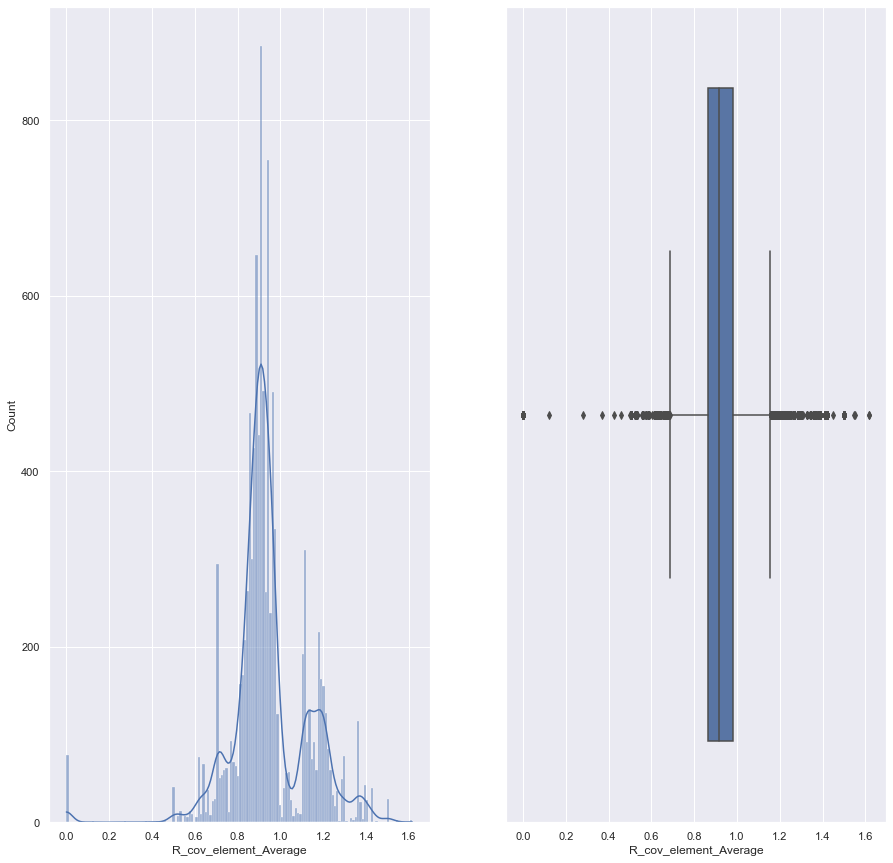

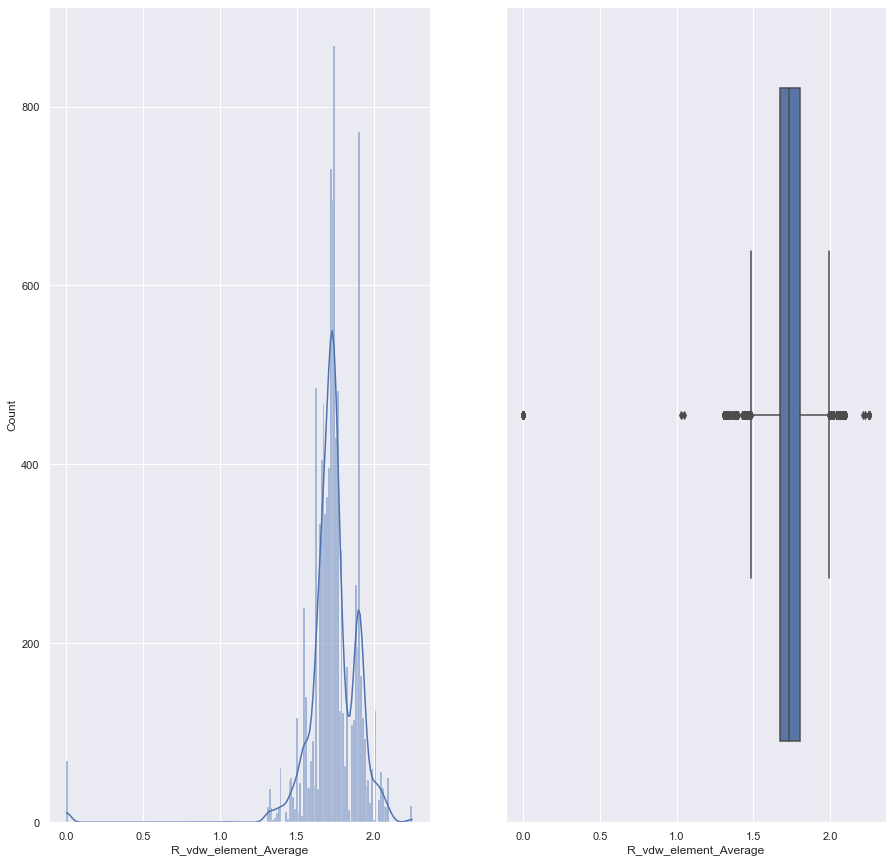

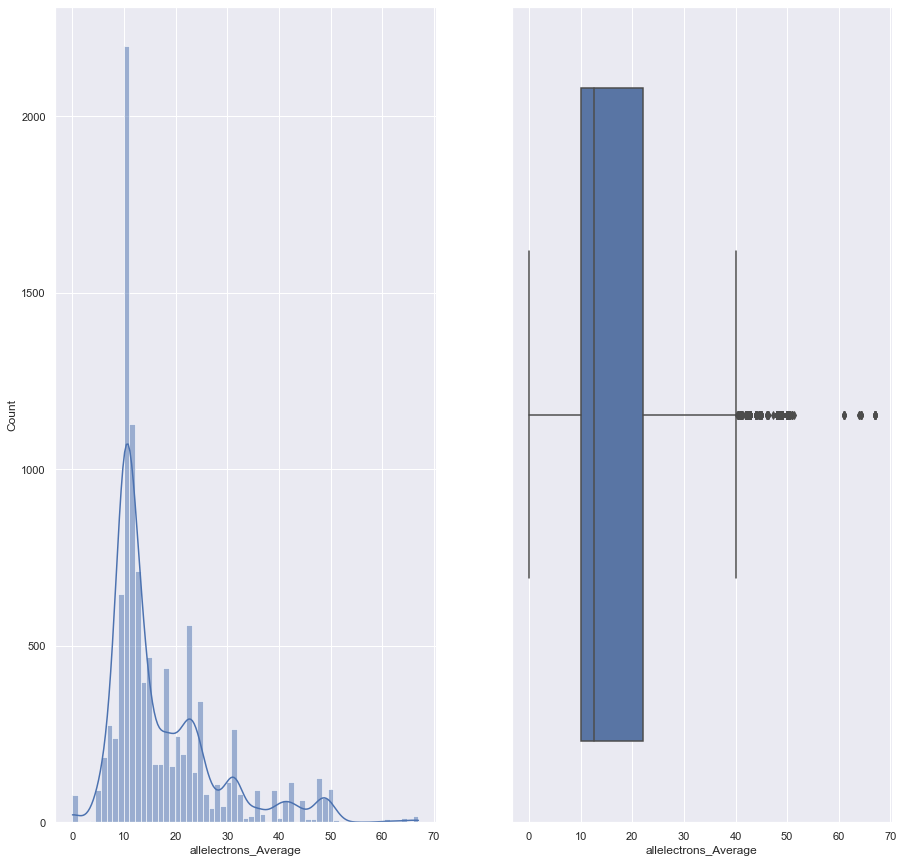

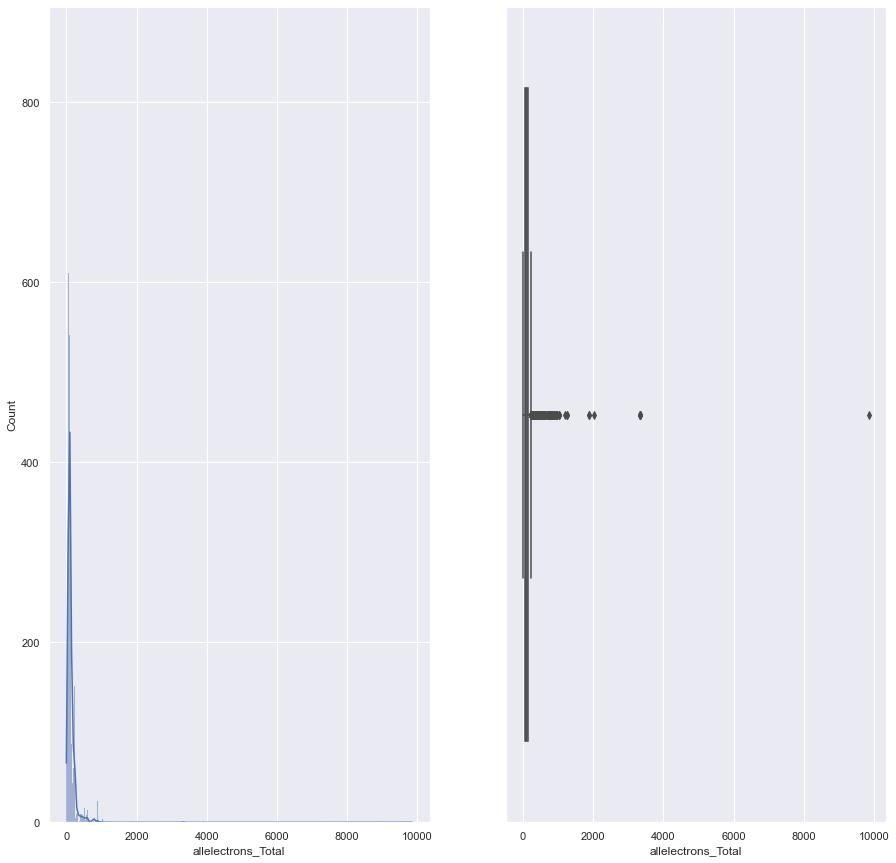

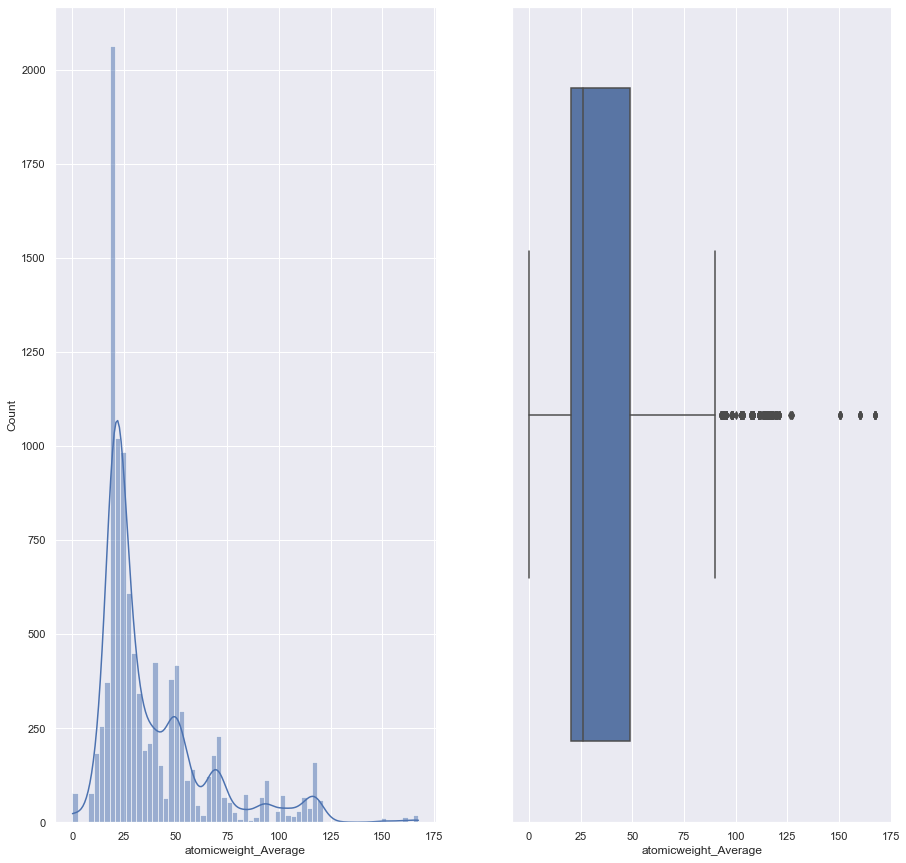

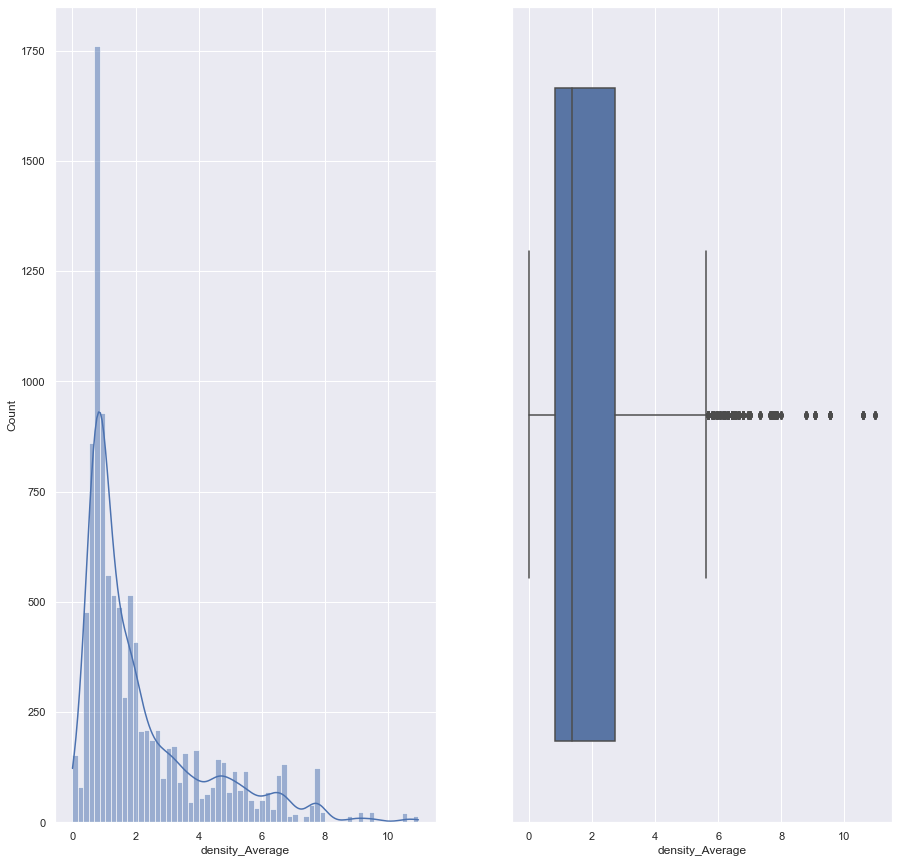

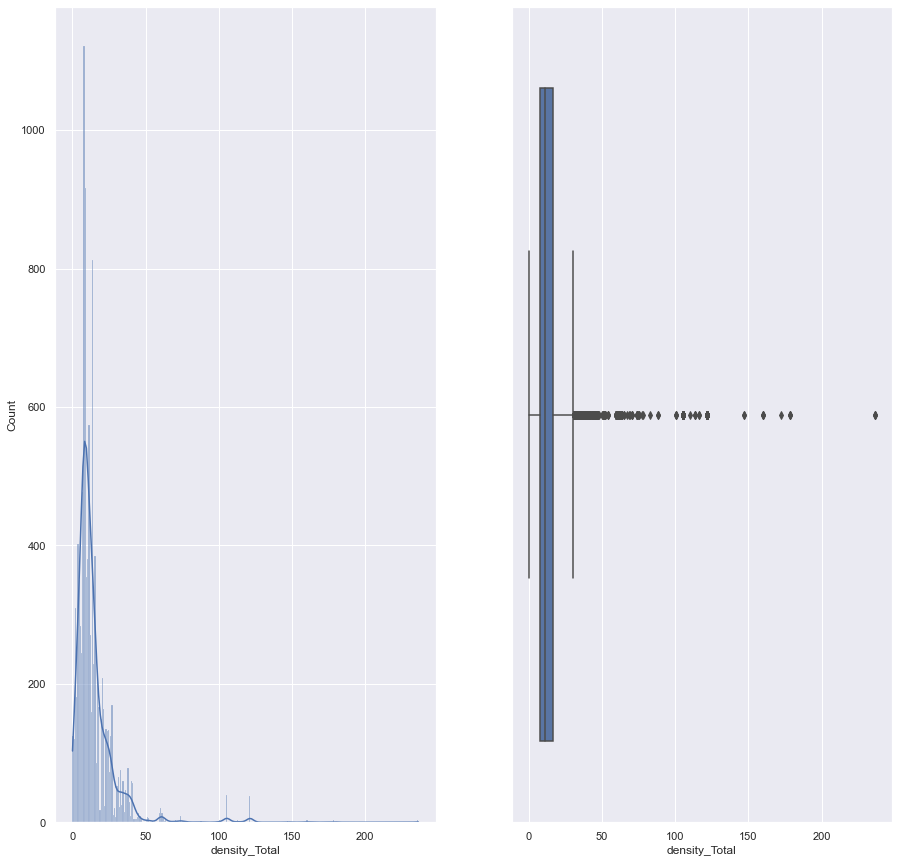

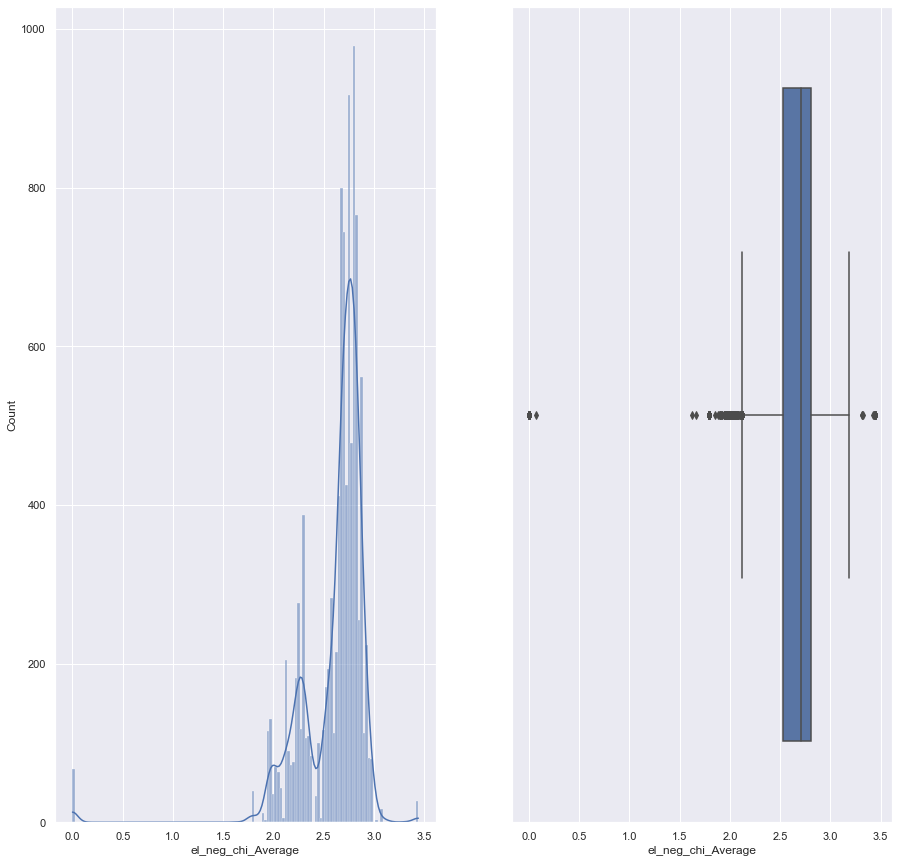

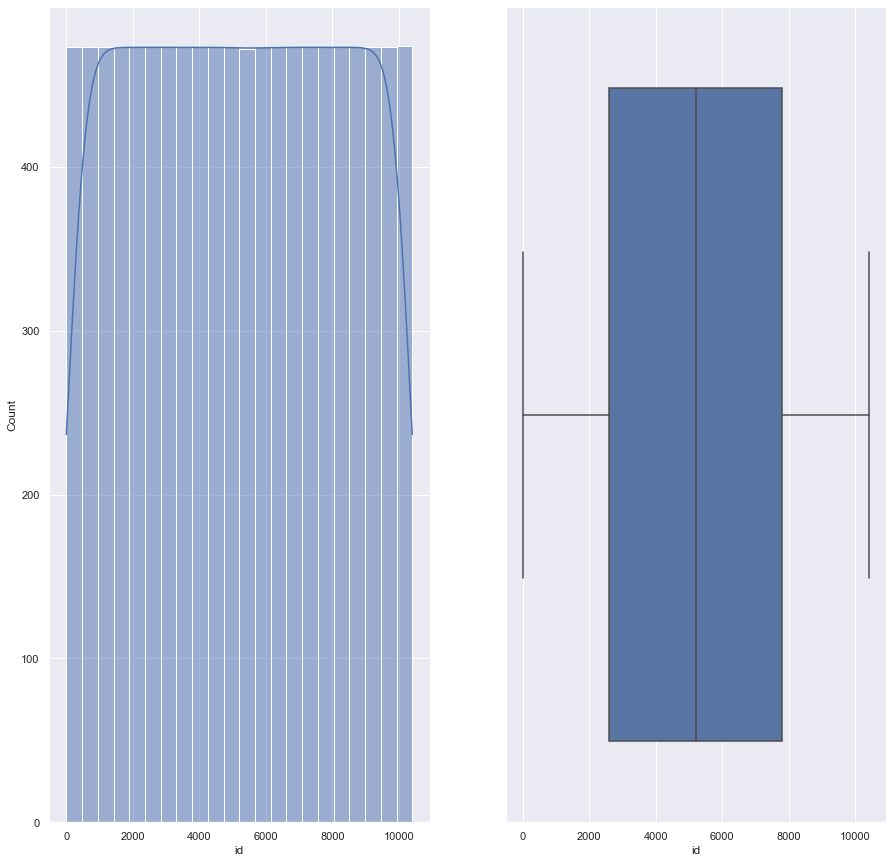

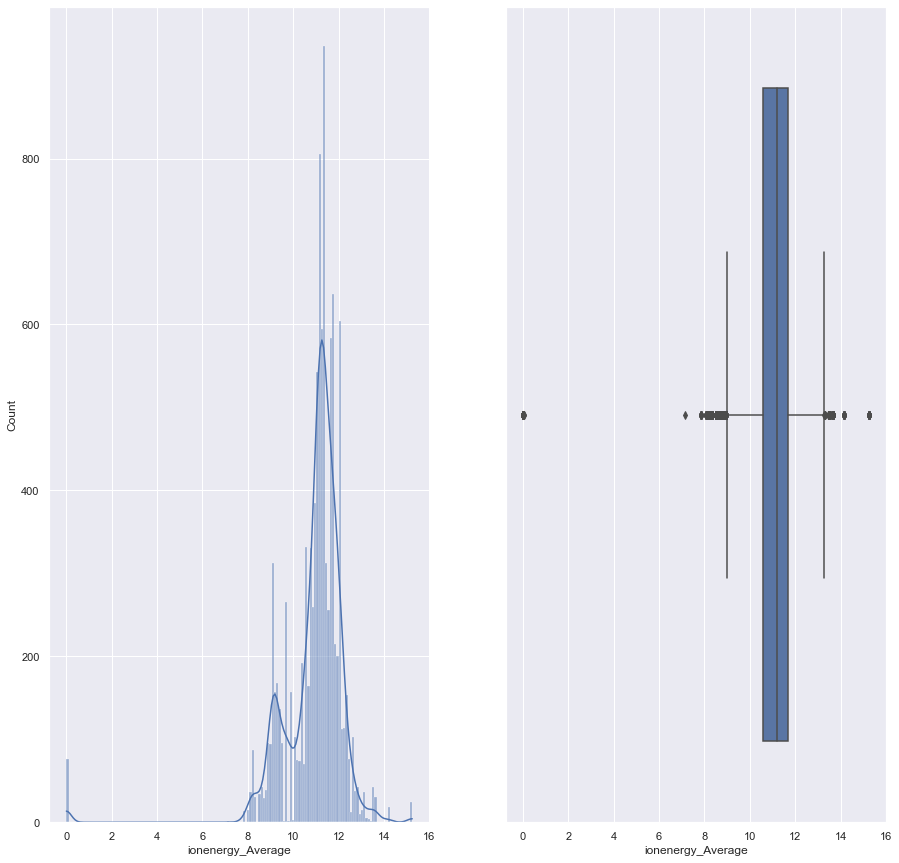

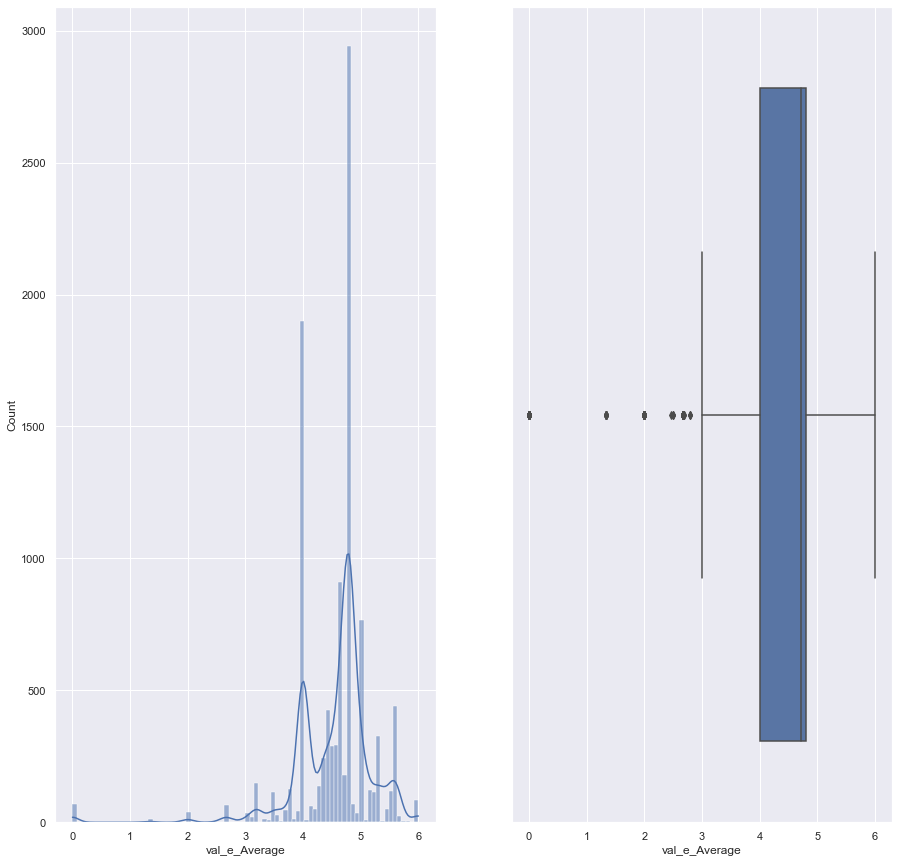

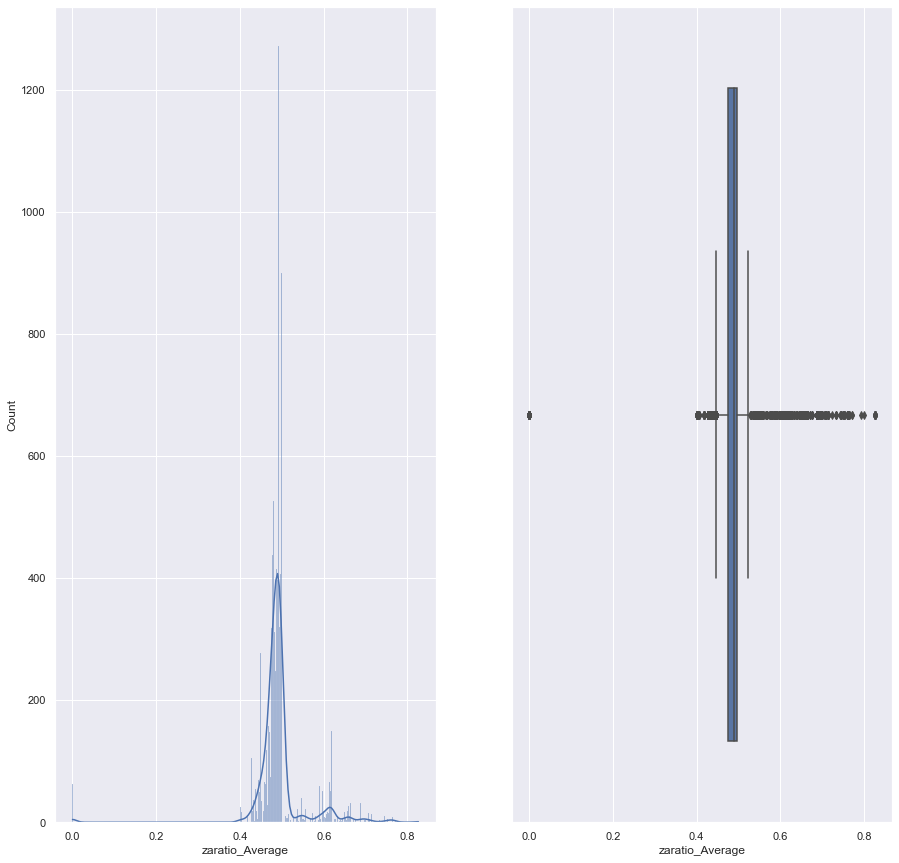

In [218]:
def plots(df):
    for i, col in enumerate(df):
        plt.figure(i)
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))
        sns.histplot(df[col], kde=True,ax=ax1)
        sns.boxplot(df[col],ax=ax2)
plots(train[train.columns.difference(['Hardness'])])

In [153]:
train.droptrain[train['allelectrons_Total']==train['allelectrons_Total'].max()]

id  allelectrons_Total  density_Total  allelectrons_Average  \
5493  5493             15300.0     643.093804              8.027397   

      val_e_Average  atomicweight_Average  ionenergy_Average  \
5493       5.401274             16.215127          12.976603   

      el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
5493            3.179236               1.567945                0.73726   

      zaratio_Average  density_Average  Hardness  
5493          0.50503          0.58105       1.5

In [154]:
test[test['allelectrons_Total']==test['allelectrons_Total'].max()]

id  allelectrons_Total  density_Total  allelectrons_Average  \
5860  16267             10116.0     502.575708              9.492063   
6772  17179             10116.0     502.575708              5.781132   

      val_e_Average  atomicweight_Average  ionenergy_Average  \
5860       4.825397             19.379077          11.213325   
6772       5.781132             19.379077          12.976603   

      el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
5860            2.738565               1.752063               0.945714   
6772            3.184434               1.577104               0.731830   

      zaratio_Average  density_Average  
5860         0.496617          0.77420  
6772         0.497615          0.59237

In [155]:
train = train.drop(train['allelectrons_Total'].idxmax())
train = train.reset_index(drop=True)

In [157]:
train.corr()

id  allelectrons_Total  density_Total  \
id                     1.000000           -0.026289      -0.006736   
allelectrons_Total    -0.026289            1.000000       0.521714   
density_Total         -0.006736            0.521714       1.000000   
allelectrons_Average   0.001871            0.107379       0.389848   
val_e_Average         -0.003512            0.084988       0.085595   
atomicweight_Average   0.002043            0.112047       0.388825   
ionenergy_Average     -0.019507            0.034047      -0.119616   
el_neg_chi_Average    -0.015572            0.034485      -0.088883   
R_vdw_element_Average -0.003107            0.058920       0.222797   
R_cov_element_Average  0.003899            0.042642       0.265722   
zaratio_Average       -0.013691            0.039878      -0.098087   
density_Average        0.006344            0.084596       0.367543   
Hardness              -0.006973           -0.066188      -0.167429   

                       allelectrons_Average  val_e_Average  \
id                                 0.001871      -0.003512   
allelectrons_Total                 0.107379       0.084988   
density_Total                      0.389848       0.085595   
allelectrons_Average               1.000000       0.004479   
val_e_Average                      0.004479       1.000000   
atomicweight_Average               0.990660       0.001957   
ionenergy_Average                 -0.359976       0.453808   
el_neg_chi_Average                -0.319328       0.549921   
R_vdw_element_Average              0.550637       0.354677   
R_cov_element_Average              0.688653       0.189514   
zaratio_Average                   -0.328970       0.093839   
density_Average                    0.803628      -0.068810   
Hardness                          -0.400732       0.161977   

                       atomicweight_Average  ionenergy_Average  \
id                                 0.002043          -0.019507   
allelectrons_Total                 0.112047           0.034047   
density_Total                      0.388825          -0.119616   
allelectrons_Average               0.990660          -0.359976   
val_e_Average                      0.001957           0.453808   
atomicweight_Average               1.000000          -0.356574   
ionenergy_Average                 -0.356574           1.000000   
el_neg_chi_Average                -0.315974           0.773999   
R_vdw_element_Average              0.529246           0.078778   
R_cov_element_Average              0.666138          -0.235223   
zaratio_Average                   -0.327455           0.638655   
density_Average                    0.796551          -0.359671   
Hardness                          -0.403176           0.203518   

                       el_neg_chi_Average  R_vdw_element_Average  \
id                              -0.015572              -0.003107   
allelectrons_Total               0.034485               0.058920   
density_Total                   -0.088883               0.222797   
allelectrons_Average            -0.319328               0.550637   
val_e_Average                    0.549921               0.354677   
atomicweight_Average            -0.315974               0.529246   
ionenergy_Average                0.773999               0.078778   
el_neg_chi_Average               1.000000               0.122087   
R_vdw_element_Average            0.122087               1.000000   
R_cov_element_Average           -0.174332               0.811809   
zaratio_Average                  0.441227               0.002999   
density_Average                 -0.322023               0.439954   
Hardness                         0.290749              -0.061567   

                       R_cov_element_Average  zaratio_Average  \
id                                  0.003899        -0.013691   
allelectrons_Total                  0.042642         0.039878   
density_Total                       0.265722        -0.098087   
allelectrons_Average                0.688

In [211]:
for i in train.columns:
    for j in range(len(train.columns)):
        if train.corr()[i][j]>0.8 and train.corr()[i][j]!=1:
            print(i)
        else:
            continue
    

allelectrons_Average
allelectrons_Average
atomicweight_Average
R_vdw_element_Average
R_cov_element_Average
density_Average


In [209]:
train.corr()['allelectrons_Average'][5]>0.8

True

In [208]:
len(train.columns)

13

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='allelectrons_Total', ylabel='id'>,
        <AxesSubplot:xlabel='density_Total', ylabel='id'>,
        <AxesSubplot:xlabel='allelectrons_Average', ylabel='id'>,
        <AxesSubplot:xlabel='val_e_Average', ylabel='id'>,
        <AxesSubplot:xlabel='atomicweight_Average', ylabel='id'>,
        <AxesSubplot:xlabel='ionenergy_Average', ylabel='id'>,
        <AxesSubplot:xlabel='el_neg_chi_Average', ylabel='id'>,
        <AxesSubplot:xlabel='R_vdw_element_Average', ylabel='id'>,
        <AxesSubplot:xlabel='R_cov_element_Average', ylabel='id'>,
        <AxesSubplot:xlabel='zaratio_Average', ylabel='id'>,
        <AxesSubplot:xlabel='density_Average', ylabel='id'>,
        <AxesSubplot:xlabel='Hardness', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='allelectrons_Total'>,
        <AxesSubplot:xlabel='allelectrons_Total', ylabel='allelectrons_Total'>,
        <AxesSubplot:xlabel='density_Total', ylabel='all

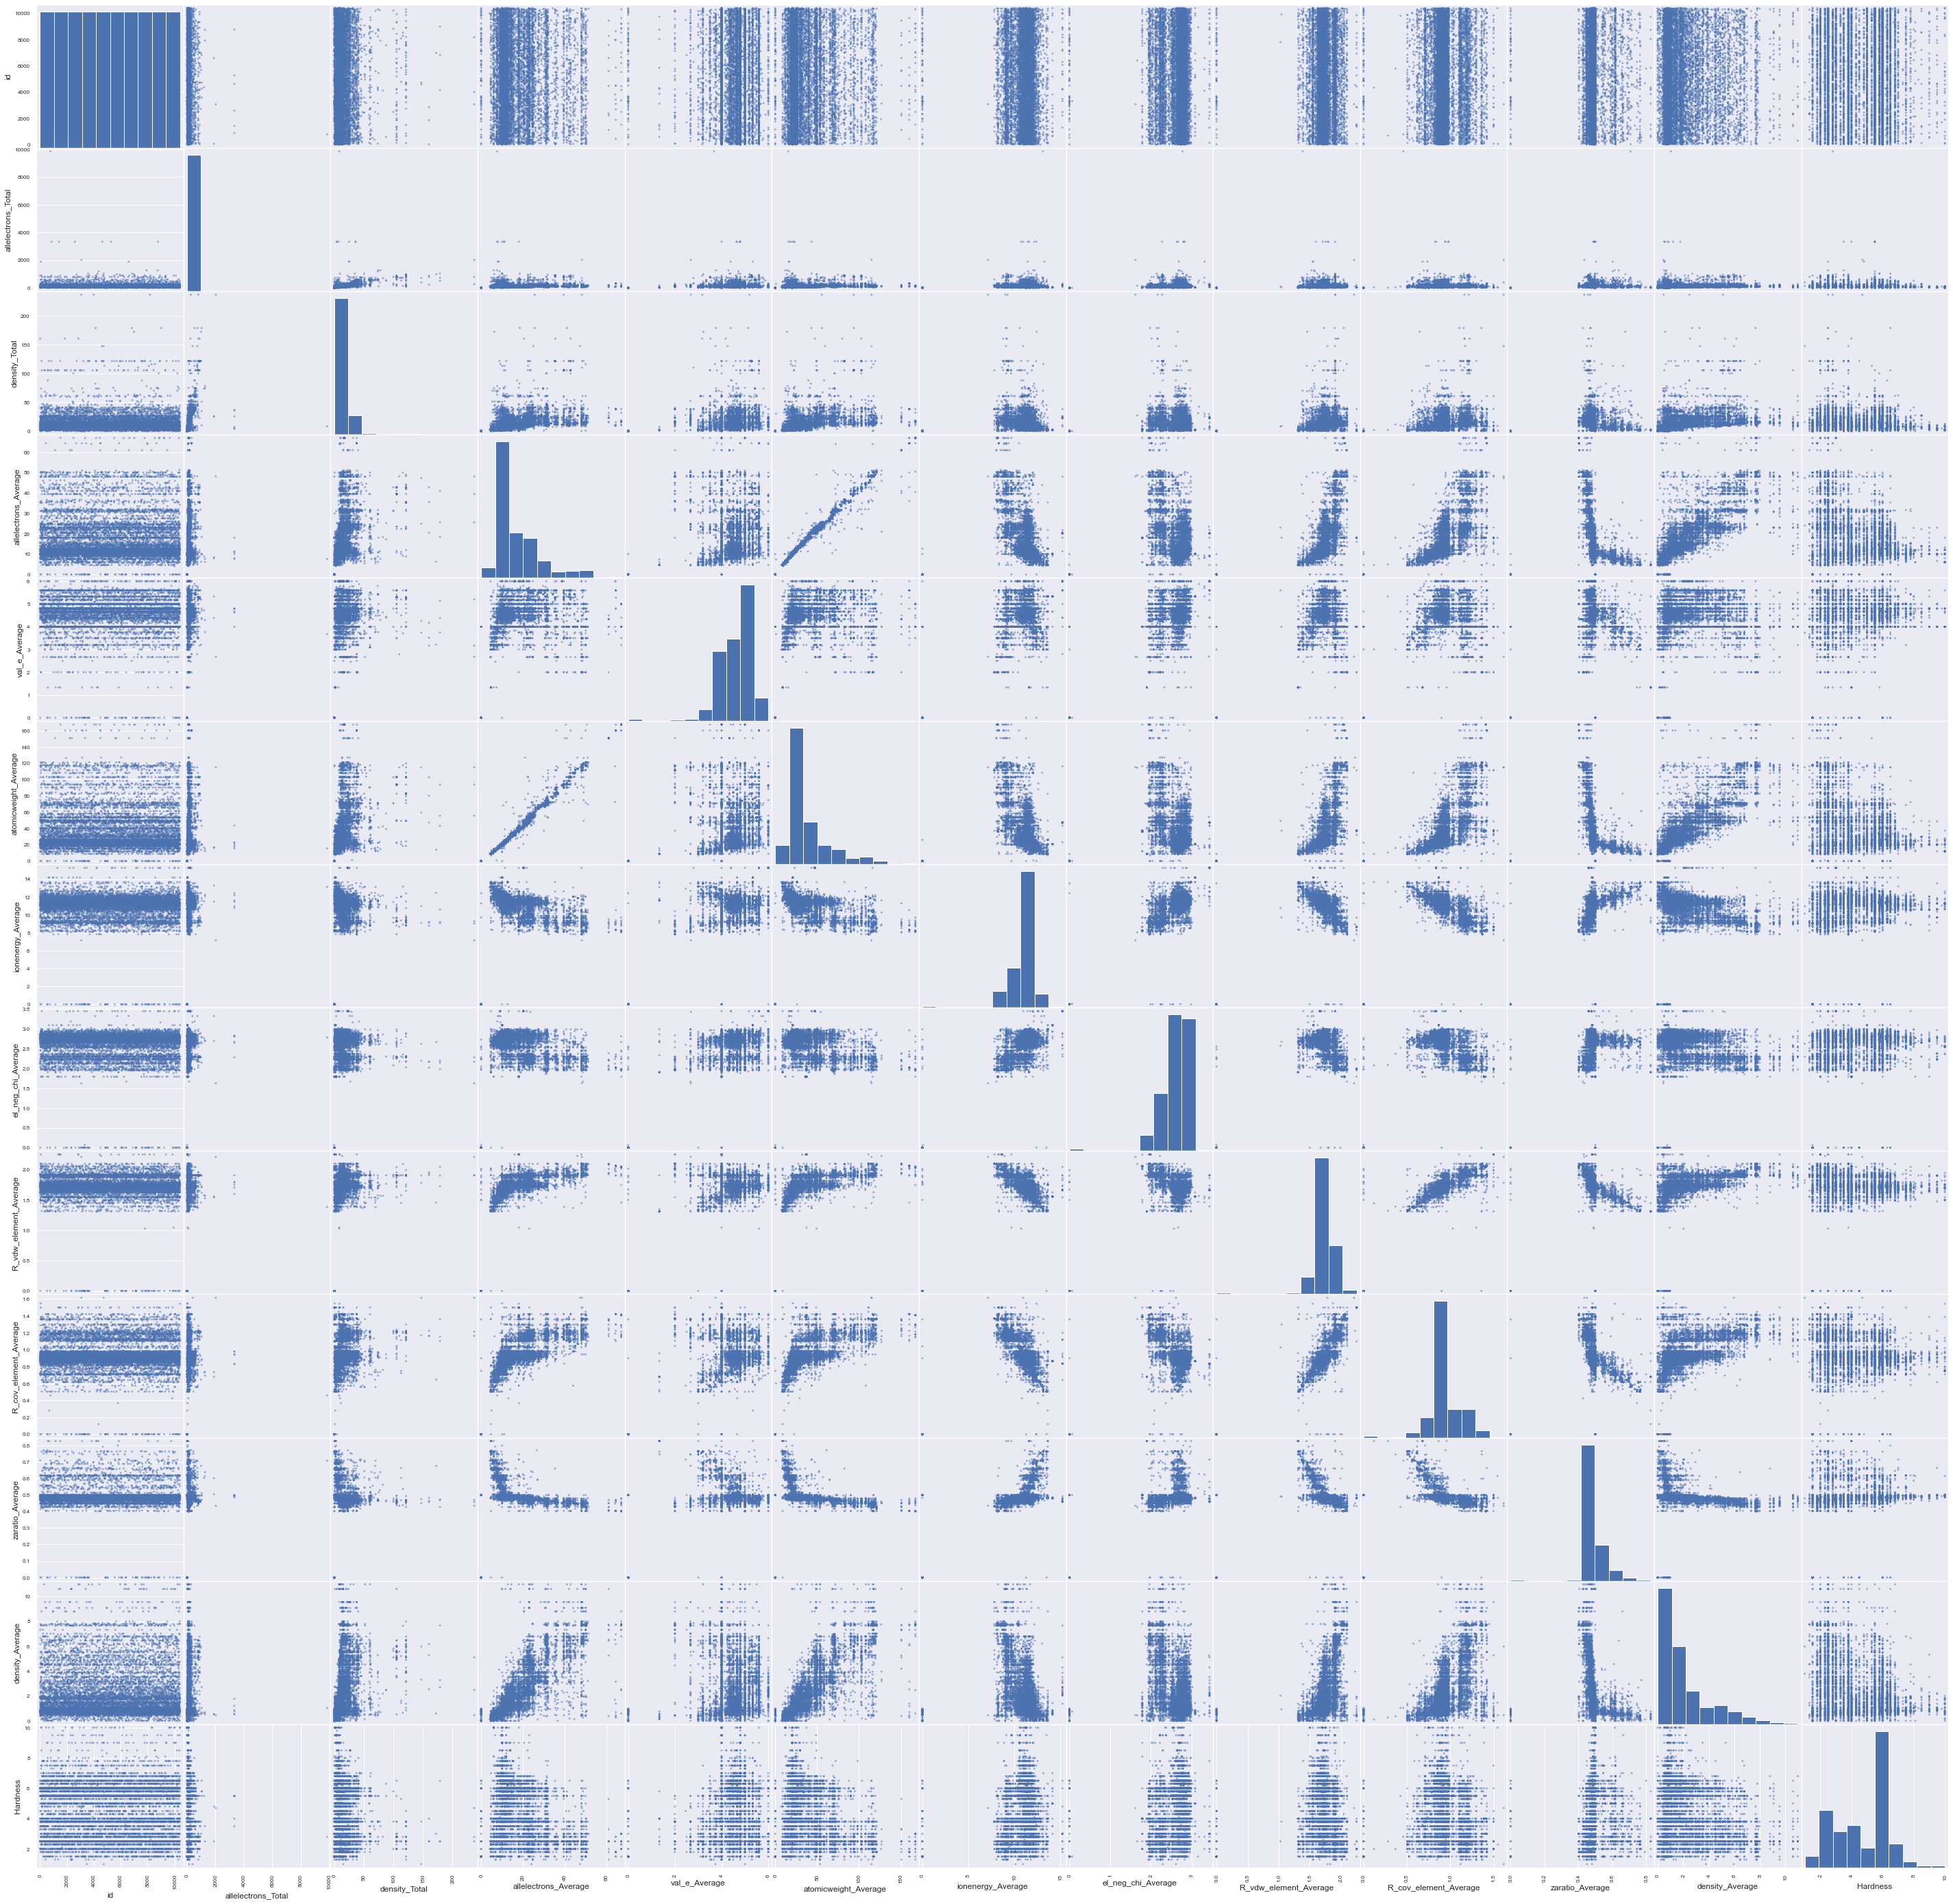

In [226]:
pd.plotting.scatter_matrix(train,figsize=(50,50))

In [234]:
mi_scores = mutual_info_regression(train[train.columns.difference(['Hardness'])], train['Hardness'])
mi_scores = pd.Series(mi_scores, name="Mutual Information", index=train.columns.difference(['Hardness']))

In [235]:
mi_scores

R_cov_element_Average    0.429033
R_vdw_element_Average    0.405034
allelectrons_Average     0.391416
allelectrons_Total       0.288407
atomicweight_Average     0.494595
density_Average          0.214878
density_Total            0.327203
el_neg_chi_Average       0.396953
id                       0.000000
ionenergy_Average        0.448176
val_e_Average            0.288805
zaratio_Average          0.485517
Name: Mutual Information, dtype: float64